In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
citydata_df = pd.read_csv(city_data_to_load)
ridedata_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_data = pd.merge(citydata_df, ridedata_df, on="city", how = 'outer')

# Display the data table for preview
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
combined_data.type.unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

## Bubble Plot of Ride Sharing Data

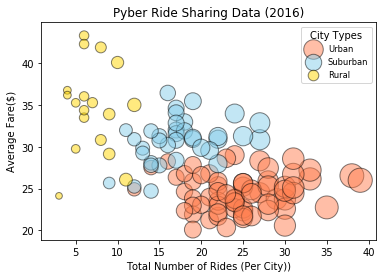

In [3]:
# Obtain the x and y coordinates for each of the three city types
urban_city = combined_data.loc[(combined_data["type"] == "Urban")]
suburban_city = combined_data.loc[(combined_data["type"] == "Suburban")]
rural_city = combined_data.loc[(combined_data["type"] == "Rural")]

urban_data = urban_city.groupby(["city"])

urb_avg_fare = urban_data["fare"].mean()
#urb_avg_fare.head()
urb_total_rides = urban_data["ride_id"].count()
#urb_total_rides.head()
urb_numbr_driv = urban_data["driver_count"].value_counts()

suburban_data = suburban_city.groupby(["city"])

suburban_avg_fare = suburban_data["fare"].mean()
#suburban_avg_fare.head()
suburban_total_rides = suburban_data["ride_id"].count()
#suburbantotal_rides.head()
suburban_numbr_driv = suburban_data["driver_count"].value_counts()
#suburban_numbr_driv.head()

rural_data = rural_city.groupby(["city"])

rural_avg_fare = rural_data["fare"].mean()
#suburban_avg_fare.head()
rural_total_rides = rural_data["ride_id"].count()
#suburbantotal_rides.head()
rural_numbr_driv = rural_data["driver_count"].value_counts()
#suburban_numbr_driv.head()


# Build the scatter plots for each city types
plt.scatter(urb_total_rides, urb_avg_fare,s=urb_numbr_driv*15,
            marker ='o', facecolors ="coral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(suburban_total_rides, suburban_avg_fare,s=suburban_numbr_driv*15,
            marker ='o', facecolors ="skyblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(rural_total_rides, rural_avg_fare,s=rural_numbr_driv*15,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.5, label="Rural")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City))")
plt.ylabel("Average Fare($)")
# Create a legend
plt.legend(title='City Types', fontsize='small', loc='upper right')

# Save Figure
plt.savefig("Pyber Ride Sharing.png")
plt.show()

## Total Fares by City Type

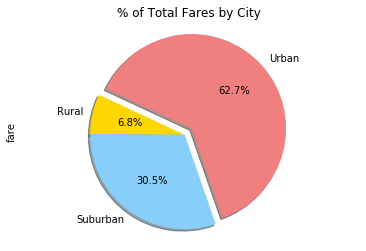

In [5]:
# Calculate Total Fare by City Type
type_data = combined_data.groupby(['type'])
total_fare = type_data['fare'].sum()

labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
fare_pie = total_fare.plot(kind="pie", y=labels, colors=colors, explode=explode, autopct="%1.1f%%",shadow=True, startangle=155, title="% of Total Fares by City") 

plt.axis("equal")
plt.savefig("Fares By City Types.png")
plt.show()

## Total Rides by City Type

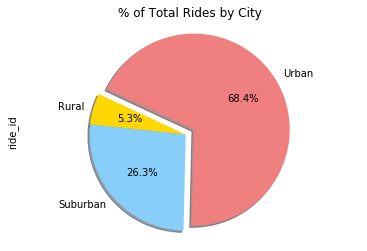

In [6]:
# Calculate Ride Percents
rides_data = combined_data.groupby(['type'])
total_rides = rides_data["ride_id"].count()

labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
rides_pie = total_rides.plot(kind="pie", y=labels, colors=colors, explode=explode, autopct="%1.1f%%",shadow=True, startangle=155, title="% of Total Rides by City") 

plt.axis("equal")
plt.savefig("Rides By City Types.png")
plt.show()


## Total Drivers by City Type

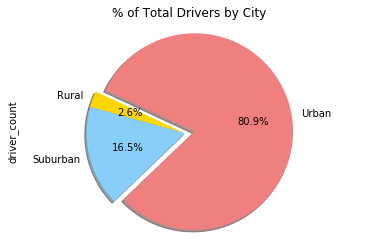

In [7]:
# Calculate Driver Percents

combined_data = combined_data.drop_duplicates('city')

drivers_data = combined_data.groupby(['type'])
total_drivers = drivers_data["driver_count"].sum()

labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
drivers_pie = total_drivers.plot(kind="pie", y=labels, colors=colors, explode=explode, autopct="%1.1f%%",shadow=True, startangle=155, title="% of Total Drivers by City") 

plt.axis("equal")
plt.savefig("Drivers By City Types.png")
plt.show()
